# BASICS 04 - Some hacks

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/antoine/homhots/HOTS/HOTS


In [23]:
import os
import pickle
from Network import network, accuracy_lagorce

# Initialisation of the time-surfaces (TS)

## In Lagorce 2017, initialisation is done with the first N TS

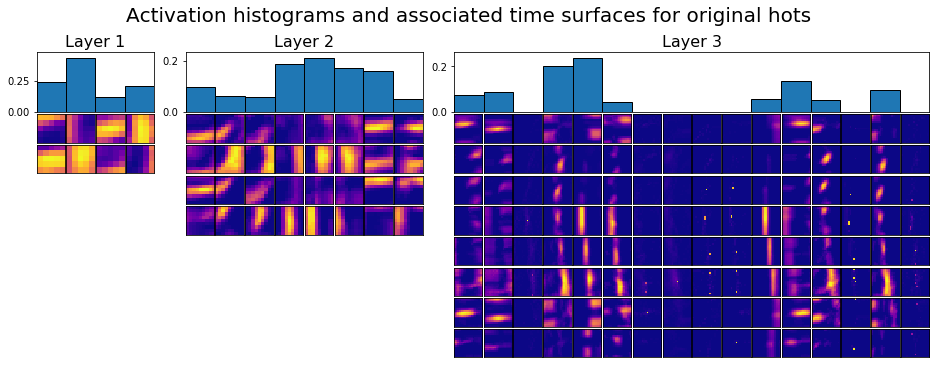

Classification results on the simple alphabet dataset: 92.5%


In [24]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = accuracy_lagorce(trainmap, testmap, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

## Random initialisation of the TS 

100%|██████████| 297828/297828 [03:47<00:00, 1308.62it/s]


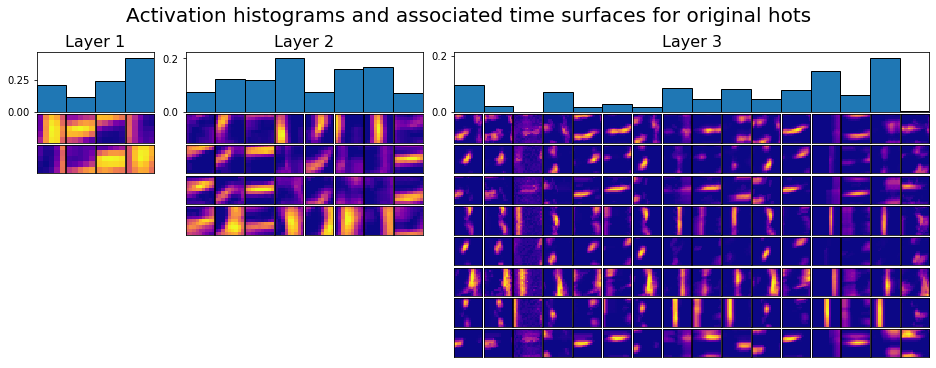

100%|██████████| 558235/558235 [06:20<00:00, 1468.52it/s]

bhatta:100.0% - eucli:100.0% - norm:100.0%


In [25]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_randominit.pkl"
if not os.path.isfile(fname):
    hotsrdn = network(algo='lagorce', krnlinit='rdn')
    hotsrdn.learninglagorce()
    hotsrdn.plotlayer()
    trainmaprdn = hotsrdn.traininglagorce()
    testmaprdn = hotsrdn.testinglagorce(trainmaprdn)
    with open(fname, 'wb') as file:
        pickle.dump([hotsrdn, trainmaprdn, testmaprdn], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsrdn, trainmaprdn, testmaprdn = pickle.load(file)
    hotsrdn.plotlayer()
    acc = accuracy_lagorce(trainmaprdn, testmaprdn, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

# Denoising

## Filtering only the TS on the first layer 

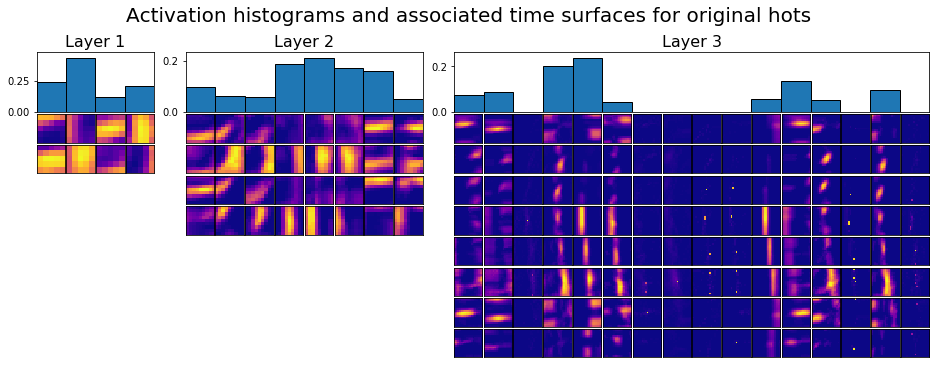

Classification results on the simple alphabet dataset: 92.5%


In [26]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = accuracy_lagorce(trainmap, testmap, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

## Filtering TS on every layer

100%|██████████| 297828/297828 [03:31<00:00, 1405.67it/s]


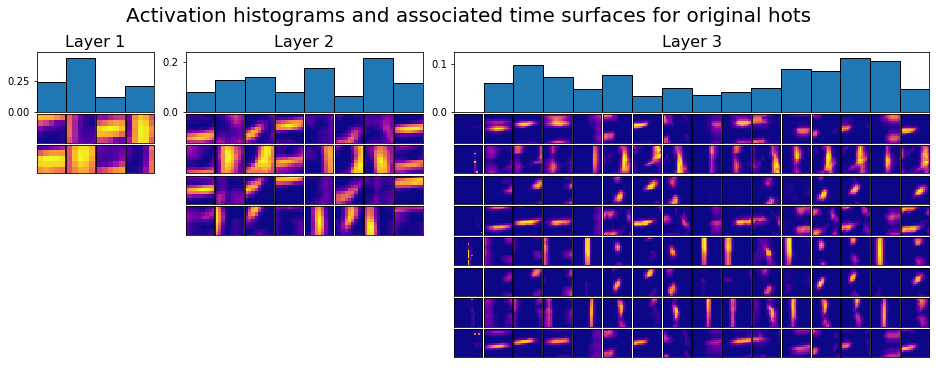

 76%|███████▌  | 423766/558235 [04:33<01:30, 1482.06it/s]

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filterall.pkl"
if not os.path.isfile(fname):
    hotsfilt = network(algo='lagorce', krnlinit='first')
    hotsfilt.learninglagorce(filtering='all')
    hotsfilt.plotlayer()
    trainmapfilt = hotsfilt.traininglagorce()
    testmapfilt = hotsfilt.testinglagorce(trainmapfilt)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfilt, trainmapfilt, testmapfilt], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfilt, trainmapfilt, testmapfilt = pickle.load(file)
    hotsfilt.plotlayer()
    acc = accuracy_lagorce(trainmapfilt, testmapfilt, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

## Applying stronger filter (2*R -> 5*R)

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filtx5.pkl"
if not os.path.isfile(fname):
    hotsfiltx5 = network(algo='lagorce', krnlinit='first', filt=5)
    hotsfiltx5.learninglagorce(filtering='all')
    hotsfiltx5.plotlayer()
    trainmapfiltx5 = hotsfiltx5.traininglagorce()
    testmapfiltx5 = hotsfiltx5.testinglagorce(trainmapfiltx5)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfiltx5, trainmapfiltx5, testmapfiltx5] , file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfiltx5, trainmapfiltx5, testmapfiltx5 = pickle.load(file)
    hotsfiltx5.plotlayer()
    acc = accuracy_lagorce(trainmapfiltx5, testmapfiltx5, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')